<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подбор-гиперпараметров-модели" data-toc-modified-id="Подбор-гиперпараметров-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подбор гиперпараметров модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

rs = 12345 #random_State


In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Имеются пропуски в Tenure (9%).

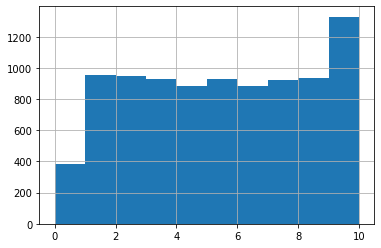

In [4]:
df["Tenure"].hist()

 Так как в распределении значений менее года значительно меньше других значений, будем считать, что пропуски обусловлены не заполнением их для новых клиентов, а следовательно заменим их на 0.

In [5]:

df["Tenure"] = df["Tenure"].fillna(0)

In [6]:
df["Tenure"].value_counts()

0.0     1291
1.0      952
2.0      950
8.0      933
3.0      928
5.0      927
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
Name: Tenure, dtype: int64

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.543400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,3.111573,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,4.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.duplicated().sum()

0

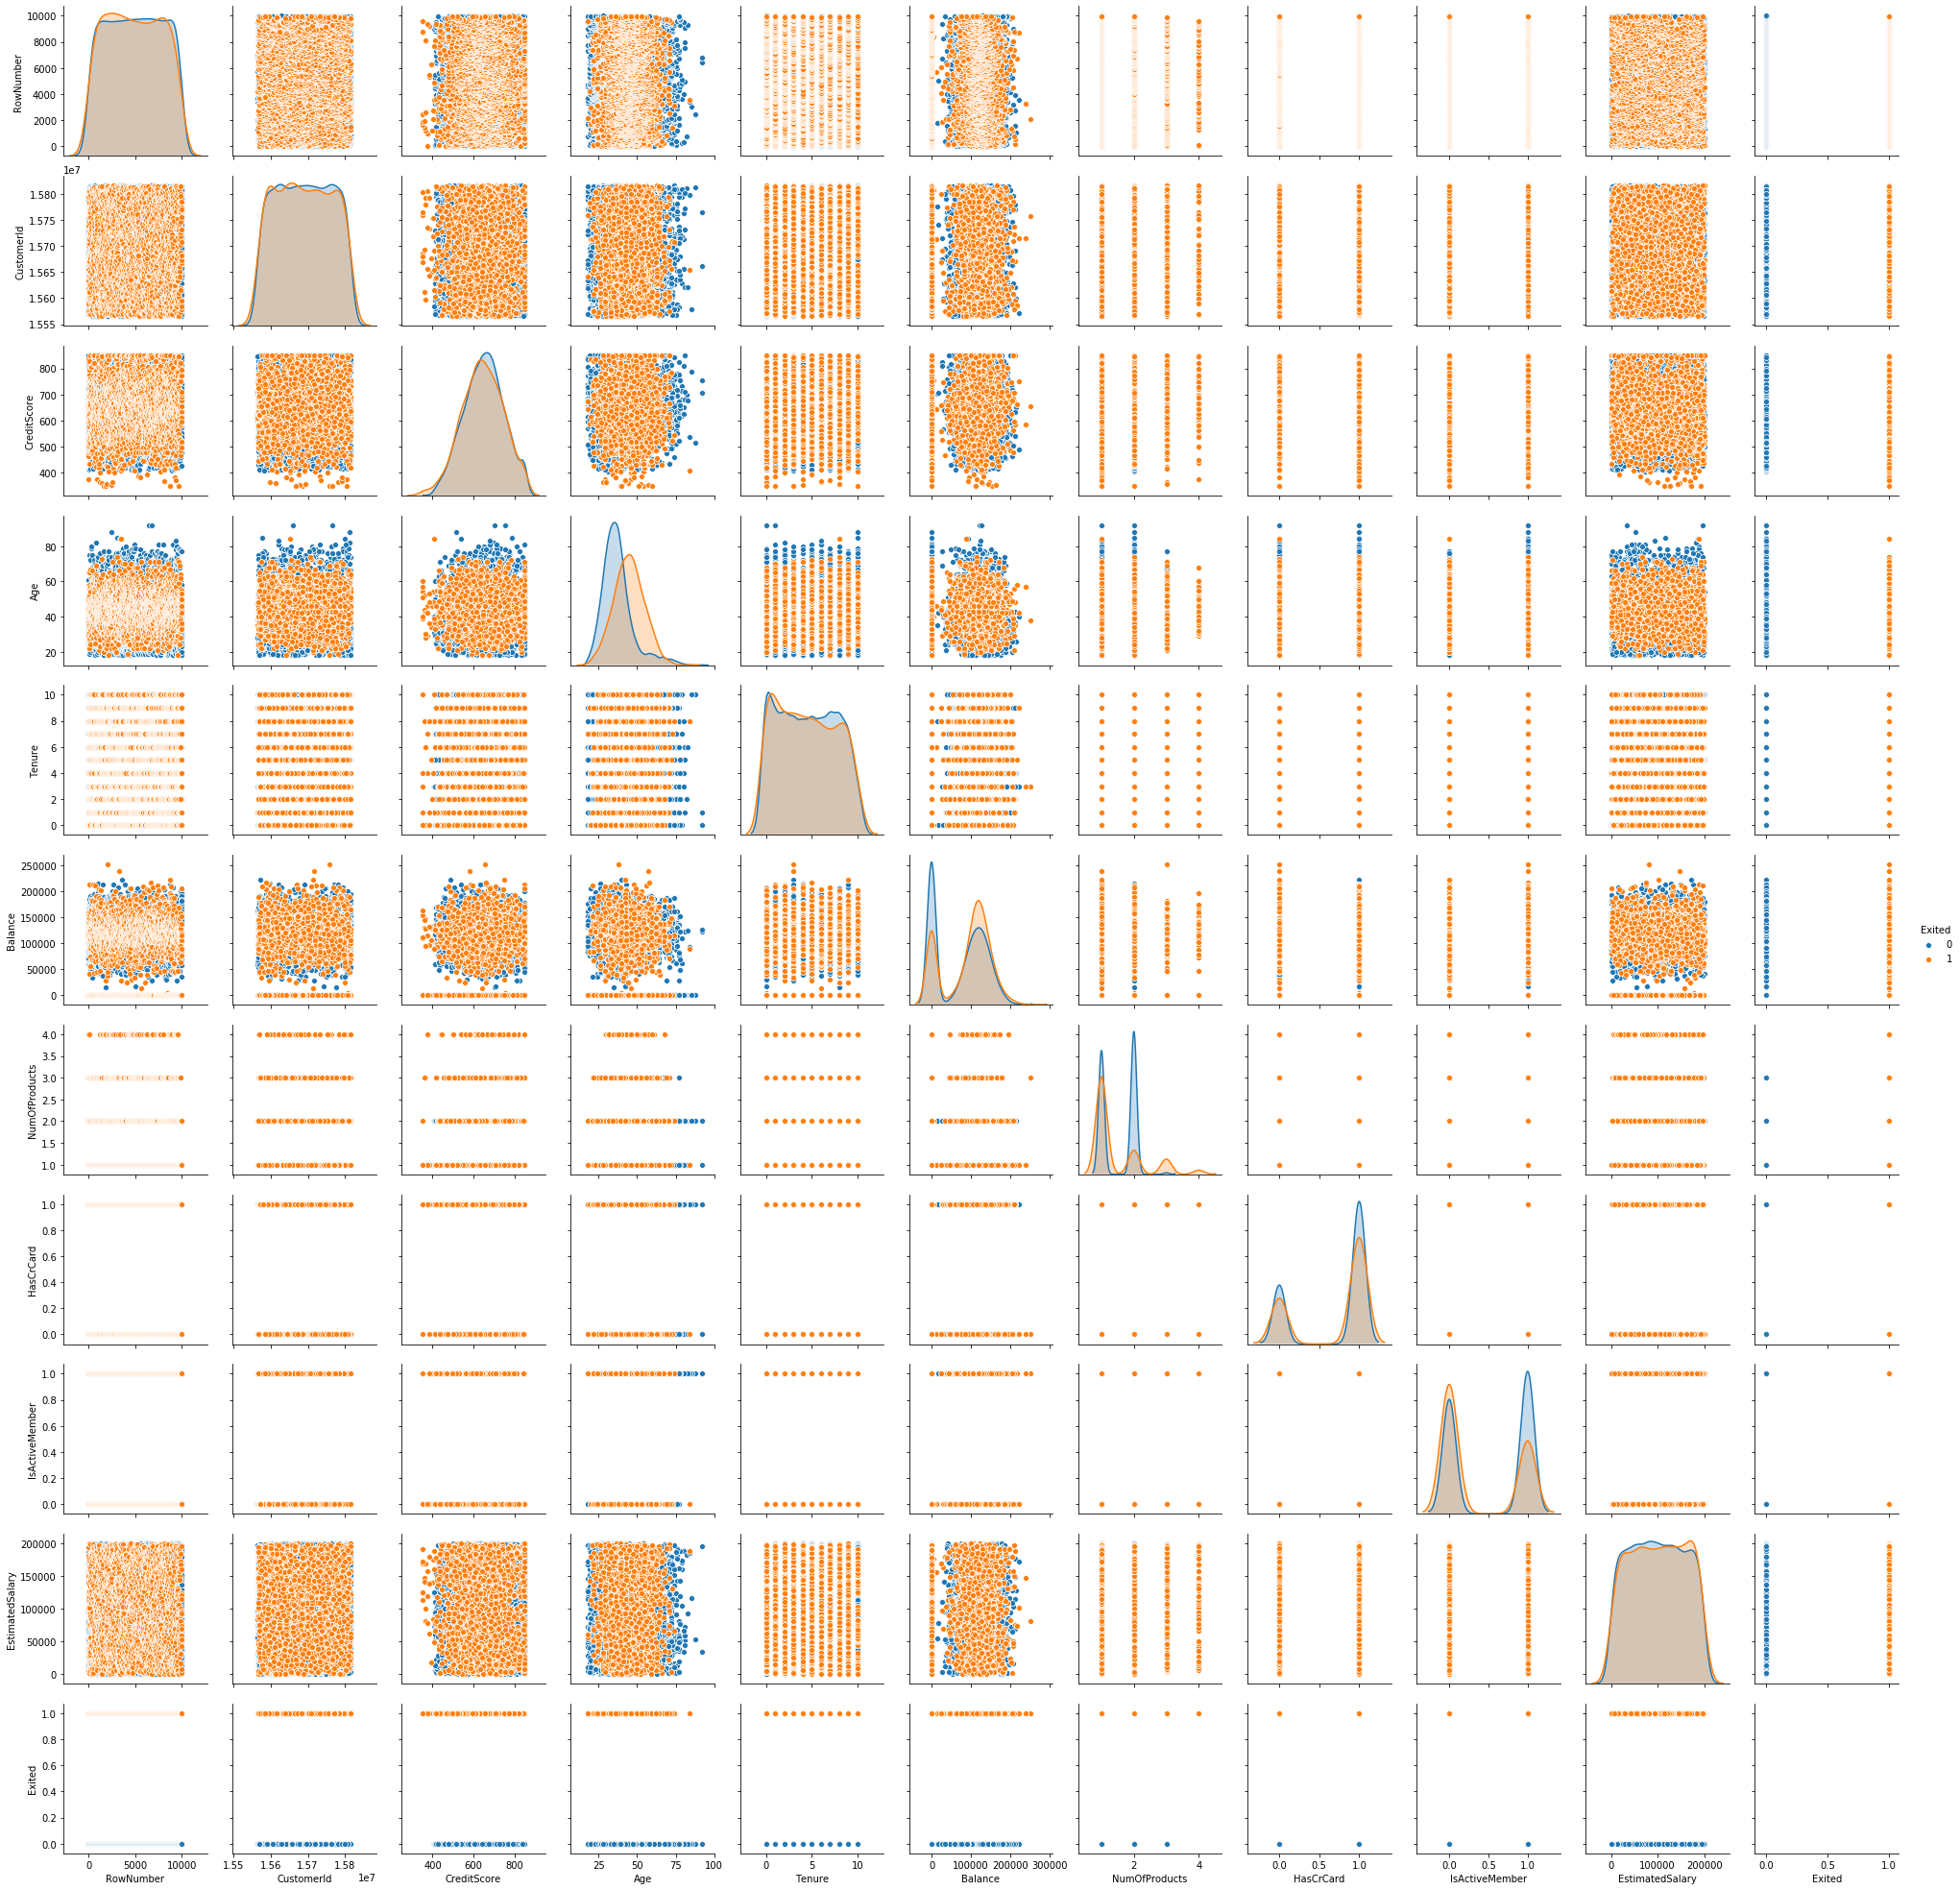

In [9]:
sns.pairplot(df, hue="Exited")

Распределение количественных переменных нормальное, значимой кореляции и зависимостей не обнаружено.

In [10]:
# удаляем не информативные для обучения признаки
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [11]:
# Преобразуем категориальные признаки в численные OHE
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


## Исследование задачи

In [12]:
features = df.drop(columns='Exited')
target = df['Exited']
target.value_counts(normalize = 1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Имеется дисбаланс значений целевого признака, что может повлиять на качество обучения моделей.
Разделим данные на обучающую, валидационную и тестовую выборки в пропорции 3:1:1 (60%-20%-20%).

In [13]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=rs)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=rs)
print(len(features_train))
print(len(features_valid))
print(len(features_test))

6000
2000
2000


In [14]:
# Масштабирование признаков
features = [features_train, features_valid, features_test]
targets = [target_train, target_valid, target_test]
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
for data in features:
    data[numeric] = scaler.transform(data[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,8.0,1.232271,1,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,8.0,0.600563,1,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,3.0,1.027098,2,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,6.0,-1.233163,2,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,2.0,1.140475,1,0,0,1.524268,1,0,0


In [15]:
def models_train_metrics(features_train, target_train, features_valid, target_valid):
    
    models = {'Decision Tree': DecisionTreeClassifier(random_state=rs), 
              'Random Forest': RandomForestClassifier(random_state=rs),
              'Logistic Regression': LogisticRegression(random_state=rs)}
   
    table = {}
    for model in models:
        scores = {}
        cur_model = models[model]
        cur_model.fit(features_train, target_train)
        prediction = cur_model.predict(features_valid)    
        scores['accuracy'] = accuracy_score(target_valid, prediction)
        scores['f1_score'] = f1_score(target_valid, prediction)
        scores['roc_auc'] = roc_auc_score(target_valid, prediction)
        table[model]=scores
    return pd.DataFrame(table)

In [16]:
models_train_metrics(features_train, target_train, features_valid, target_valid)

,Decision Tree,Random Forest,Logistic Regression
accuracy,0.787000,0.853500,0.802500
f1_score,0.481752,0.556732,0.333895
roc_auc,0.671735,0.701448,0.594401


### Вывод
Лучшей на несбалансированных данных показала себя модель, обученная Random Forest с показателем f1-меры 0.56, roc_auc 0.70. При это показатели roc_auc всех моделей превышают 0.5, что  говорит об их превосходстве над случайной моделью.

## Борьба с дисбалансом

Используем 2 способа выравнивания балансов класса:
- путём повторения объектов меньшего класса - upsampling.
- путём уменьшения объектов большего класса - downsampling.

In [17]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=rs)
    
    return features_upsampled, target_upsampled

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=rs)
    
    return features_downsampled, target_downsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [18]:
target_upsampled.value_counts(normalize = 1)

0    0.501043
1    0.498957
Name: Exited, dtype: float64

In [19]:
len(target_upsampled)

9588

In [20]:
target_downsampled.value_counts(normalize = 1)

0    0.501043
1    0.498957
Name: Exited, dtype: float64

In [21]:
len(target_downsampled)

2397

In [22]:
models_train_metrics(features_upsampled, target_upsampled, features_valid, target_valid)

,Decision Tree,Random Forest,Logistic Regression
accuracy,0.779500,0.844500,0.701000
f1_score,0.457565,0.580297,0.488889
roc_auc,0.656432,0.723043,0.694823


In [23]:
models_train_metrics(features_downsampled, target_downsampled, features_valid, target_valid)

,Decision Tree,Random Forest,Logistic Regression
accuracy,0.697000,0.784000,0.702500
f1_score,0.488176,0.568862,0.489270
roc_auc,0.694935,0.746408,0.694891


### Вывод
Балансировка классов помогла довести f1-меру модели Random Forest с 0.56 до 0.58.

Значительнее всех качества после балансировки приобрела Logistic Regression (вырос 0.33 до 0.48).

На модели Decision Tree балансировка положительно не сказалась.

Для дальнешего развития и тестирования модели будем использовать модель, обученную Random Forest
на выборке с увеличением числа классов upsampled. Именно она показала большую эффективность после балансировки по сравнению с выборкой downsampled (0.58 > 0.56).

## Подбор гиперпараметров модели

In [24]:
model = RandomForestClassifier(random_state = rs)
params = {
            "class_weight" : ("balanced", None),
            "n_estimators" : (1, 10, 20, 40, 60, 80, 100),
            "max_depth" : (1, 5, 10),
            "min_samples_leaf" : (1, 10),
            "min_samples_split" : (2,10)
         }
grid = GridSearchCV(model, params, cv=5, scoring='f1')
grid.fit(features_upsampled, target_upsampled)
res = grid.score(features_valid, target_valid)
print("best_params -", grid.best_params_)
print("f1_score -", res)

best_params - {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}
f1_score - 0.6212952799121844


In [25]:
prediction = grid.predict(features_valid)    
mod_acur = accuracy_score(target_valid, prediction)
mod_f1 = f1_score(target_valid, prediction)
mod_roc_auc = roc_auc_score(target_valid, prediction)
print("metrics with best params\n")
print("accuracy:",mod_acur)
print("f1_score:",mod_f1)
print("roc_auc:",mod_roc_auc)

metrics with best params

accuracy: 0.8275
f1_score: 0.6212952799121844
roc_auc: 0.7721450649955541


### Вывод
После подбора гиперпараметров модели RandomForestClassifier, довели показатель f1-меры до 0.62, что больше 0.59 требуемых по т.з. Площадь под ROC-кривой — AUC-ROC выросла до 0.77.

## Тестирование модели

Прежде чем проверить модель на тестовой выборке, заново обучим модель с оптимальными параметрами на объединенной обучающей + валидационной выборке.

In [26]:
features_concat = pd.concat([features_train] + [features_valid])
target_concat = pd.concat([target_train] + [target_valid])
features_upsampled, target_upsampled = upsample(features_concat, target_concat, 4)
model = RandomForestClassifier(random_state = rs, class_weight="balanced",
    max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=80)
model.fit(features_upsampled, target_upsampled)

prediction = model.predict(features_test)

mod_acur = accuracy_score(target_test, prediction)
mod_f1 = f1_score(target_test, prediction)
mod_roc_auc = roc_auc_score(target_test, prediction)
 

print("metrics with best params\n")
print("accuracy:",mod_acur)
print("f1_score:",mod_f1)
print("roc_auc:",mod_roc_auc)

metrics with best params

accuracy: 0.82
f1_score: 0.6095444685466377
roc_auc: 0.7630327206549228


### Вывод
Наша модель переобучившись на объединенной выборке, на тестовой выборке показала результат:
- f1_score: 0.61
- roc_auc: 0.76

## Вывод

На этапе предобоботки данных были обнаружены пропуски в столбце Tensure, которые было решено заменить нулями (как людей, недавно ставшими клиентами банка), однако необходимо уточнить у заказчика причину их появления. 

Для подготовки данных к обучению, категориальные признаки преобразовали в численные, а количественные масштабировали. Разделили данные на обучающую, валидационную и тестовую выборки в пропорции 3:1:1 (60%-20%-20%). Обнаружили дисбаланс значений целевого признака (4:1).

Для решения поставленной задачи была проведена проверка трёх алгоритмов машинного обучения: логистическая регрессия, дерево решений, случайный лес.

Без учета дисбаланса, лучшие показатели f1-меры и  площадь под ROC-кривой — AUC-ROC получила модель, обученная случайным лесом (f1-мера = 0.56 ,  AUC-ROC = 0.67). Однако все модели показали значения roc_auc более 0.5, что  говорит об их превосходстве над случайной моделью.

Выравнив баланс классов путём повторения объектов меньшего класса (увеличением присутствия в ней положительных значений признака Exited), лучшие показатели так же были у модели, обученной случайным лесом (f1-мера = 0.58 ,  AUC-ROC = 0.72). При этом наибольшее влияние на качество балансировка оказала на модель, обученной логистической регрессией (вырос 0.33 до 0.48).

Подобрали оптимальные параметры для нашей модели, обученной случайным лесом: 

- class_weight = "balanced" (вес классов)
- max_depth = 10 (максимальная глубина дерева)
- min_samples_leaf = 1 (минимальное число объектов в листьях дерева — нижних узлах с ответами.)
- min_samples_split = 2 (минимальное число объектов в узле дерева, достаточное для дальнейшего разделения)
- n_estimators = 80 (число деревьев)

Подбор параметров позволил улучшить показатели нашей модели:
- на валидационной выборке: f1-мера = 0.62 ,  AUC-ROC = 0.77
- на тестовой выборке (после переобучения на объединеной с валидационной выборках): 
    f1-мера = 0.61 ,  AUC-ROC = 0.76
